In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


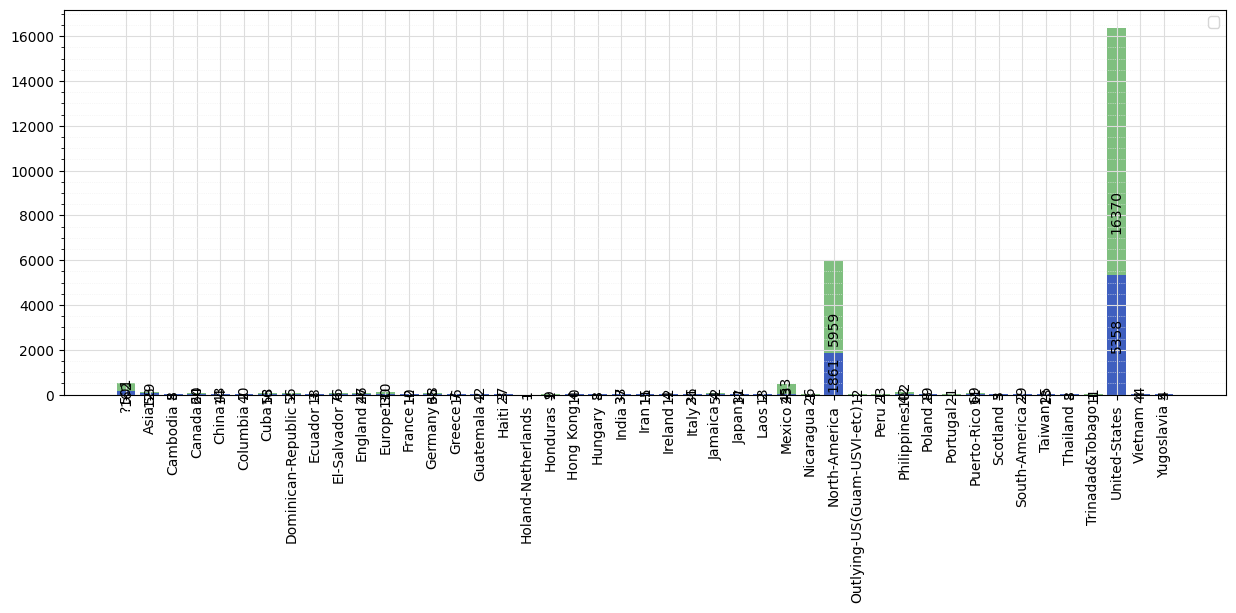

In [2]:
fig, ax = plt.subplots(figsize=(15, 5))
sort_criteria =  ['United-States','Puerto-Rico','Canada','Outlying-US(Guam-USVI-etc)','Cuba','Honduras','Jamaica','Mexico','Dominican-Republic','Haiti','Guatemala','Nicaragua','El-Salvador','Trinadad&Tobago','Ecuador','Columbia','Peru','England','Germany','Greece','Italy','Poland','Portugal','Ireland','France','Scotland','Hungary','Yugoslavia','Holand-Netherlands','Cambodia','India','Japan','China','Iran', 'Philippines','Vietnam','Laos','Taiwan','Thailand','Hong']

# Load the data
data = pd.read_csv('../adult/simulations/westin.csv')
# continents

# all countries
data_lte = data[data['income']=='<=50K']
data_gte = data[data['income']=='>50K']
data_nc1 = data_lte.groupby(['native-country'])['income'].count().reset_index()
data_nc2 = data_gte.groupby(['native-country'])['income'].count().reset_index()

ax.bar(data_nc1['native-country'], data_nc1['income'], color='green', alpha=0.5)
ax.bar(data_nc2['native-country'], data_nc2['income'], color='blue', alpha=0.5)

ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# ax.set_title(level, loc='left', fontstyle='oblique', fontsize='medium')
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.bar_label(ax.containers[0], label_type='center', rotation=90)
ax.bar_label(ax.containers[1], label_type='center', rotation=90)

plt.legend()
plt.xticks(rotation=90)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


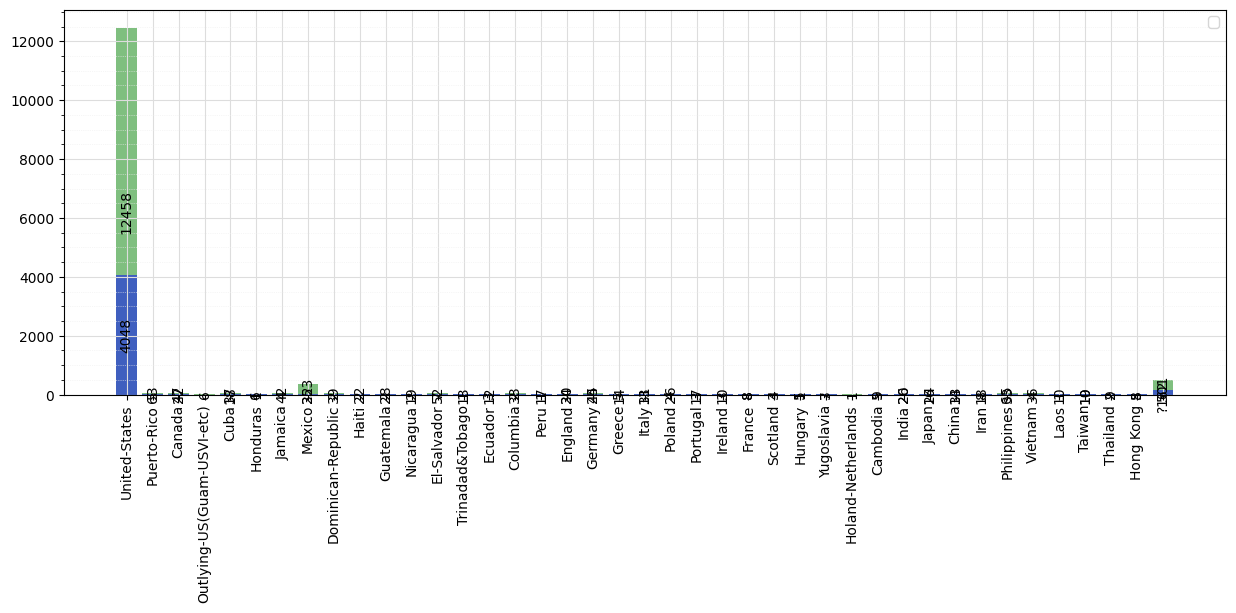

In [2]:
fig, ax = plt.subplots(figsize=(15, 5))
sort_criteria =  ['United-States','Puerto-Rico','Canada','Outlying-US(Guam-USVI-etc)','Cuba','Honduras','Jamaica','Mexico','Dominican-Republic','Haiti','Guatemala','Nicaragua','El-Salvador','Trinadad&Tobago','Ecuador','Columbia','Peru','England','Germany','Greece','Italy','Poland','Portugal','Ireland','France','Scotland','Hungary','Yugoslavia','Holand-Netherlands','Cambodia','India','Japan','China','Iran', 'Philippines','Vietnam','Laos','Taiwan','Thailand','Hong Kong', '?']

# Load the data
data = pd.read_csv('../adult/simulations/high.csv')
# divide income
data_lte = data[data['income']=='<=50K']
data_gte = data[data['income']=='>50K']
# continents

# all countries
data_nc1 = data_lte.groupby(['native-country'])['income'].count().reindex(sort_criteria).reset_index()
data_nc2 = data_gte.groupby(['native-country'])['income'].count().reindex(sort_criteria).reset_index()

ax.bar(data_nc1['native-country'], data_nc1['income'], color='green', alpha=0.5)
ax.bar(data_nc2['native-country'], data_nc2['income'], color='blue', alpha=0.5)

ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# ax.set_title(level, loc='left', fontstyle='oblique', fontsize='medium')
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.bar_label(ax.containers[0], label_type='center', rotation=90)
ax.bar_label(ax.containers[1], label_type='center', rotation=90)

plt.legend()
plt.xticks(rotation=90)
plt.show()

/var/folders/69/knkk0bvs2zj17g66y54b741c0000gn/T/ipykernel_68261/2049125142.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12 )
/var/folders/69/knkk0bvs2zj17g66y54b741c0000gn/T/ipykernel_68261/2049125142.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12 )
/var/folders/69/knkk0bvs2zj17g66y54b741c0000gn/T/ipykernel_68261/2049125142.py:66: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


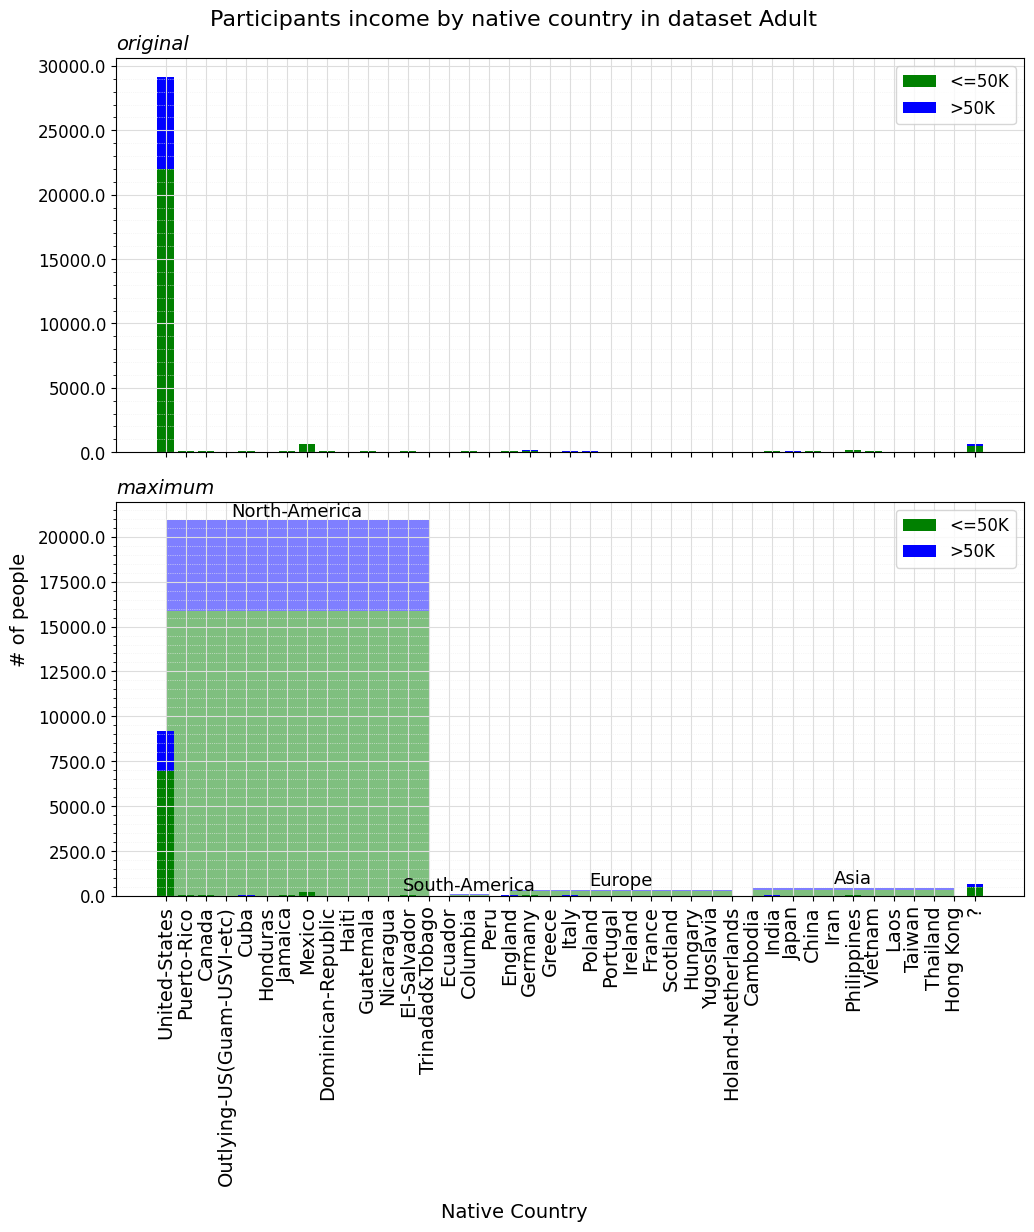

In [3]:
fig = plt.figure(figsize=(10.5,12.5), layout='constrained')
ax_array = fig.subplots(2, 1, squeeze=False, sharey="row", sharex=True)
sort_criteria =  ['United-States','Puerto-Rico','Canada','Outlying-US(Guam-USVI-etc)','Cuba','Honduras','Jamaica','Mexico','Dominican-Republic','Haiti','Guatemala','Nicaragua','El-Salvador','Trinadad&Tobago','Ecuador','Columbia','Peru','England','Germany','Greece','Italy','Poland','Portugal','Ireland','France','Scotland','Hungary','Yugoslavia','Holand-Netherlands','Cambodia','India','Japan','China','Iran', 'Philippines','Vietnam','Laos','Taiwan','Thailand','Hong Kong', '?']

def multiplots(ax, level):
    # Load the data
    if level == 'original':
        data = pd.read_csv('../adult/adult_cleaned.csv')
    else:
        data = pd.read_csv('../adult/simulations/'+level+'.csv')

    labels = ['North-America', 'South-America', 'Europe', 'Asia']

    # divide income
    data_lte = data[data['income']=='<=50K'] # 1
    data_gt = data[data['income']=='>50K']  # 2
    # continents
    if level != 'original':
        data_ncc1 = data_lte.groupby(['native-country'])['income'].count()
        data_ncc2 = data_gt.groupby(['native-country'])['income'].count()
        
        if level == 'low':
            labels = ['North-America', 'Europe', 'Asia']
            data_continent1 = data_ncc1.loc[labels].reset_index()
            data_continent2 = data_ncc2.loc[labels].reset_index()

            groups = [6.5, 22.5, 34]
            widths = [13, 11, 10]
        else:
            data_continent1 = data_ncc1.loc[labels].reset_index()
            data_continent2 = data_ncc2.loc[labels].reset_index()

            groups = [6.5, 15, 22.5, 34]
            widths = [13, 2, 11, 10]
        
        ax.bar(groups, data_continent1['income'], width=widths, align='center', color='green', alpha=0.5)
        ax.bar(groups, data_continent2['income'], width=widths, align='center', color='blue', alpha=0.5, bottom=data_continent1['income'])

    # all countries

    data_country1 = data_lte.groupby(['native-country'])['income'].count().reindex(sort_criteria, fill_value=0).reset_index()
    data_country2 = data_gt.groupby(['native-country'])['income'].count().reindex(sort_criteria, fill_value=0).reset_index()

    ax.bar(data_country1['native-country'], data_country1['income'], color='green', label='<=50K')
    ax.bar(data_country2['native-country'], data_country2['income'], color='blue', label='>50K', bottom=data_country1['income'])

    # graph settings
    ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
    ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    ax.set_title(level, loc='left', fontstyle='oblique', fontsize=14)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_yticklabels(ax.get_yticks(), fontsize=12 )
    if level != 'original':
        ax.bar_label(ax.containers[1], label_type='edge', labels=labels, fontsize=13)
    ax.legend(fontsize=12)

multiplots(ax_array[0, 0], 'original')
multiplots(ax_array[1, 0], 'maximum')
# multiplots(ax_array[2, 0], 'medium')
# multiplots(ax_array[3, 0], 'high')
fig.suptitle('Participants income by native country in dataset Adult', fontsize=16)
fig.supxlabel('Native Country', fontsize=14)
fig.supylabel('# of people', fontsize=14) 
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()